<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/1216_2_SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

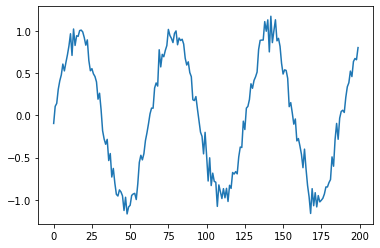

In [ ]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [ ]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.001))

# train the RNN
r = model.fit(X[:N//2], Y[:N//2], epochs=80, validation_data=(X[N//2:], Y[N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 53ms/step - loss: 0.1238 - val_loss: 0.1057
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0989 - val_loss: 0.0850
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0807 - val_loss: 0.0712
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0700 - val_loss: 0.0641
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0639 - val_loss: 0.0616
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0598 - val_loss: 0.0605
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0553 - val_loss: 0.0580
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0505 - val_loss: 0.0541
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0449 - val_loss: 0.0505
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0403 - val_loss: 0.0460
Epoch 11/80
3/3 [============

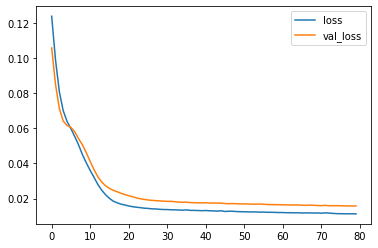

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# "Wrong" forecast using true targets

validation_target = Y[N//2:]
validation_predictions = []

# index of first validation input
i = N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

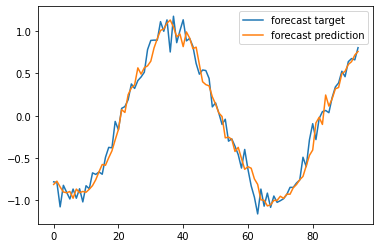

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[N//2:]
validation_predictions = []

# first validation input
last_x = X[N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

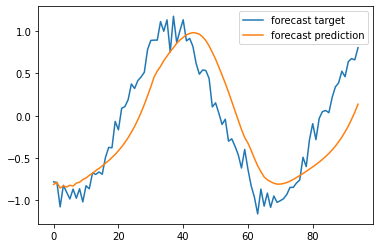

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()